In [2]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', as_frame=False)

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

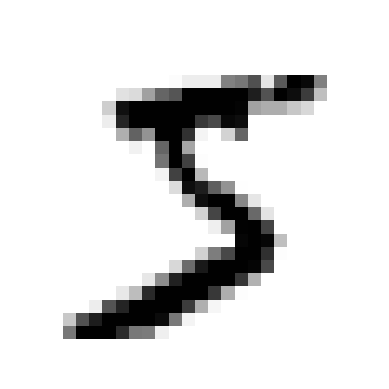

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [5]:
y[0]

'5'

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

이진 분류

In [7]:
y_train_5 = (y_train == '5')  # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
from PIL import Image # 정창수 교수님이 물려주신 PIL 코드...
pixels=[]
image=Image.open("2.jpg")
width, height = image.size
for i in range(height):
    for j in range(width):
        pixel = image.getpixel((j, i)) 
        pixels.append(255-pixel[1])

In [10]:
import numpy as np
pixels=np.array(pixels)

In [11]:
sgd_clf.predict([pixels]), sgd_clf.predict([some_digit]) # 내꺼는 2라고 써서 아니라고 나오고, some_digit은 5가 맞다고 잘 나온다! 

(array([False]), array([ True]))

# 성능 측정

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") 
# 모든 교차 검증 폴드에 대해 정확도가 95% 이상이다! 

array([0.95035, 0.96035, 0.9604 ])

## 오차 행렬

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# 다 교차 검증으로 수행 

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [15]:
y_train_perfect_predictions = y_train_5  # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## 정밀도와 재현율

In [16]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [17]:
# 추가 코드 – TP / (FP + TP) 식으로 정밀도를 계산
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [18]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [19]:
#정밀도를 계산
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [21]:
#f1 점수를 계산
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [23]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [24]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

# 다중 분류

In [25]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train_5가 아니고 y_train을 사용

SVC(random_state=42)

In [26]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [27]:
svm_clf.predict([pixels]) # 2잘 나온다! 지렸다

array(['2'], dtype=object)

In [28]:
y_pre=svm_clf.predict(X_test) # y결괏값 출력

In [29]:
y_true=y_test

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pre) # 정확도 : 순서를 지켜주어야 한다! 

0.9302

In [32]:
precision_score(y_true,y_pre,average="micro") # 정밀도

0.9302

In [33]:
recall_score(y_true,y_pre,average="micro") # 재현율

0.9302

In [34]:
f1_score(y_true,y_pre,average="micro") # f1_score

0.9302

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

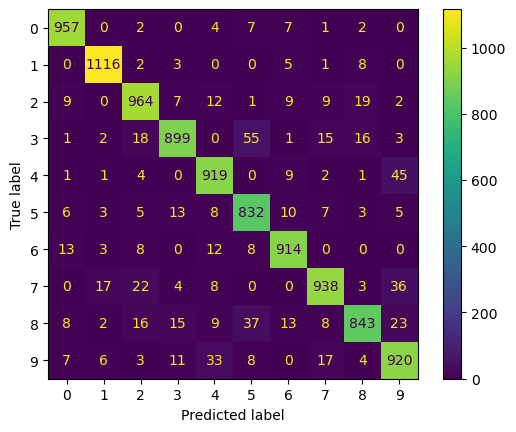

In [37]:
conplot=ConfusionMatrixDisplay(confusion_matrix(y_true,y_pre))
conplot.plot()
plt.show()